# Project Luther

Kenny Leung - kenleung11@gmail.com

Part 7/8 - Combining and cleaning data obtained

This notebook documents the process of combining and cleaning the data scraped previously and obtaining a final dataset to be used in the regression model. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline

In [2]:
# read in all the csv files and create dataframes with pandas
college_df = pd.read_csv('college_data.csv',index_col=0)
draft_df = pd.read_csv('draft_data.csv',index_col=0)
player_df = pd.read_csv('player_raw.csv',index_col=0)
rookie_df = pd.read_csv('rookie_raw.csv', index_col=0)
rookie_advanced_df = pd.read_csv('rookie_advanced_raw.csv', index_col=0)

In [3]:
# filter out draft data before 2003 since college data is only available from 2003, remove other columns
draft_df = draft_df[draft_df['Draft_Yr'] > 2002]
draft_df = draft_df.loc[:,['Player','College','BPM']]

In [4]:
# merge dataframes on Player
result_df = player_df.merge(college_df, on='Player', how='left')
result_df = result_df.merge(draft_df, on='Player', how='left')
result_df = result_df.merge(rookie_df, on='Player', how='left')
result = result_df.merge(rookie_advanced_df, on='Player', how='left')

In [5]:
result.columns

Index(['Player', 'Birthday', 'Height_ft', 'Height_in', 'Weight', 'Yrs', 'GP',
       'MPG', 'FGM', 'FGA_x', 'FG_Perc', '3PM', '3PA_x', '3P_Perc', 'FTM',
       'FTA_x', 'FT_Perc', 'TOV_x', 'PF_x', 'ORB_x', 'DRB_x', 'RPG', 'APG',
       'SPG', 'BPG', 'PPG', 'College', 'BPM_x', 'Season_x', 'Age_x', 'Tm_x',
       'Lg_x', 'Pos_x', 'G_x', 'GS', 'MP_x', 'FG', 'FGA_y', 'FG%', '3P',
       '3PA_y', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA_y', 'FT%',
       'ORB_y', 'DRB_y', 'TRB', 'AST', 'STL', 'BLK', 'TOV_y', 'PF_y', 'PTS',
       'Season_y', 'Age_y', 'Tm_y', 'Lg_y', 'Pos_y', 'G_y', 'MP_y', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM_y',
       'VORP'],
      dtype='object')

In [6]:
# drafted players who did not play college
no_college = result[np.isnan(result['Yrs'])]
no_college.shape

(226, 85)

In [7]:
# drafted players who did not play in the NBA
no_nba = result[np.isnan(result['G_y'])]
no_nba.shape

(96, 85)

In [8]:
result = result[np.isfinite(result['Yrs'])]
result = result[np.isfinite(result['G_y'])]
result = result[np.isfinite(result['PTS'])]

In [9]:
result.shape

(559, 85)

In [10]:
print('Rookie Year PTS mean: ',result['PTS'].mean())
print('Rookie Year PTS std: ',result['PTS'].std())
print('Rookie Year PTS max: ',result.loc[result['PTS'].idxmax(axis=1)]['Player'],result['PTS'].max())
print('Rookie Year PTS min: ',result.loc[result['PTS'].idxmin(axis=1)]['Player'],result['PTS'].min())

Rookie Year PTS mean:  5.499105545617175
Rookie Year PTS std:  3.983930434568123
Rookie Year PTS max:  Blake Griffin 22.5
Rookie Year PTS min:  JamesOn Curry 0.0


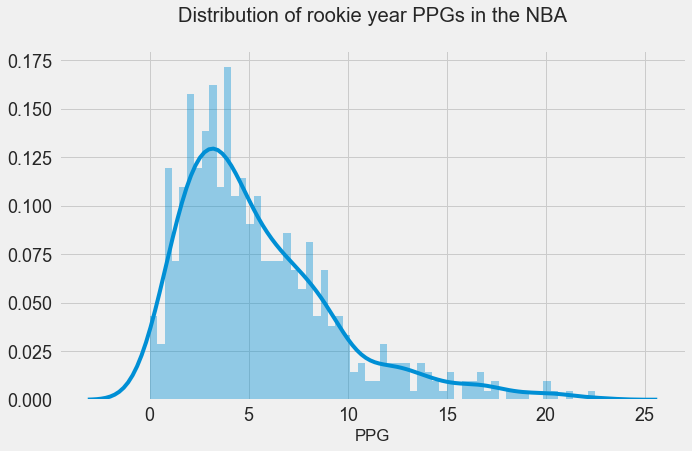

In [11]:
style.use('fivethirtyeight')

plt.figure(figsize=(10,6))
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

sns.distplot(result['PTS'], bins=60)
plt.title('Distribution of rookie year PPGs in the NBA\n')
plt.xlabel('PPG')

# Creating dummy variables for the College column

There are certain colleges in NCAA basketball that produce a larger majority of good NBA players. Here, I grouped the drafted players by their college teams and looked at the top 10 colleges that contributed to the highest rookie year BPM. However, I only looked at colleges that produced more than 5 drafted NBA players in my timeframe. I then created a new college column, and changed the college value to "Bad" if the player did not attend one of the top 10 colleges. I then used this column to get dummy variables using pandas get_dummies.

In [99]:
# sort by box plus/minus (BPM)
sorted_PPG = result.sort_values(['PTS'], ascending=False)
sorted_PPG.columns

Index(['Player', 'Birthday', 'Height_ft', 'Height_in', 'Weight', 'Yrs', 'GP',
       'MPG', 'FGM', 'FGA_x', 'FG_Perc', '3PM', '3PA_x', '3P_Perc', 'FTM',
       'FTA_x', 'FT_Perc', 'TOV_x', 'PF_x', 'ORB_x', 'DRB_x', 'RPG', 'APG',
       'SPG', 'BPG', 'PPG', 'College', 'BPM_x', 'Season_x', 'Age_x', 'Tm_x',
       'Lg_x', 'Pos_x', 'G_x', 'GS', 'MP_x', 'FG', 'FGA_y', 'FG%', '3P',
       '3PA_y', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA_y', 'FT%',
       'ORB_y', 'DRB_y', 'TRB', 'AST', 'STL', 'BLK', 'TOV_y', 'PF_y', 'PTS',
       'Season_y', 'Age_y', 'Tm_y', 'Lg_y', 'Pos_y', 'G_y', 'MP_y', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM_y',
       'VORP'],
      dtype='object')

In [100]:
# check number of unique colleges
sorted_PPG['College'].nunique()

128

In [101]:
# average rookie year BPM grouped by College
sorted_PPG.groupby(['College']).mean()['PTS'].sort_values(ascending=False).head(20)

College
Davidson College                     17.500000
Kansas State University              13.900000
Rider University                     11.100000
Weber State University               10.400000
Morehead State University            10.200000
Indiana University                    9.500000
University of Oklahoma                9.075000
Washington State University           8.900000
University of Southern California     8.533333
St. John's University                 8.200000
St. Bonaventure University            7.800000
Eastern Washington University         7.600000
Wake Forest University                7.480000
Ohio State University                 7.412500
Seton Hall University                 7.400000
University of Kentucky                7.389286
DePaul University                     7.300000
South Dakota State University         7.200000
University of Memphis                 7.077778
Georgia Institute of Technology       6.900000
Name: PTS, dtype: float64

In [102]:
# create a dictionary with college and the count of how many NBA drafts they produced
college_count = dict(sorted_PPG.groupby(['College']).count()['PTS'])

In [103]:
def CollegeCountAbove5(college):
    '''
    Function to be used to create new column to filter out colleges that did not produce more than 5
    drafted players in the NBA
    '''
    try:
        if college_count[college] > 5:
            return 'Y'
        else:
            return 'N'
    except:
        return 'null'

In [104]:
result.drop(result.index[528], inplace=True)

In [105]:
# create a new column to see whether that player went to a college that produced more than 5 NBA drafts
result['College_above_5'] = result['College'].apply(CollegeCountAbove5)

In [106]:
# top colleges and their average rookie BPMs
result[result['College_above_5'] == 'Y'].groupby(['College']).mean()['PTS'].sort_values(ascending=False).head(20)

College
Indiana University                            9.500000
University of Southern California             8.533333
Ohio State University                         7.412500
University of Kentucky                        7.296296
University of Memphis                         7.077778
Georgia Institute of Technology               6.900000
Duke University                               6.620000
Syracuse University                           6.600000
Louisiana State University                    6.577778
Stanford University                           6.557143
University of Connecticut                     6.535000
University of Kansas                          6.457895
University of Texas at Austin                 6.435714
University of North Carolina                  6.222222
University of Michigan                        6.183333
University of Washington                      6.166667
Georgetown University                         6.066667
University of Florida                         5.892308
Un

In [107]:
# find top colleges based on drafted players BPM
top_colleges = list(result[result['College_above_5'] == 'Y'].groupby(['College']).mean()['PTS'].sort_values(ascending=False).head(10).index)

In [108]:
top_colleges

['Indiana University',
 'University of Southern California',
 'Ohio State University',
 'University of Kentucky',
 'University of Memphis',
 'Georgia Institute of Technology',
 'Duke University',
 'Syracuse University',
 'Louisiana State University',
 'Stanford University']

In [109]:
def TopCollege(x):
    '''
    Function to categorize all colleges outside of the top 10 colleges as "bad"
    '''
    try:
        if x in top_colleges:
            return x
        else:
            return 'Bad'
    except:
        return 'null'

In [110]:
# create new column, shows college if it is in top college, bad otherwise
result['College_adj'] = result['College'].apply(TopCollege)

In [111]:
# create new dataframe of dummy variables, 1 if attended top college, 0 otherwise
dummies = pd.get_dummies(result['College_adj'])

In [112]:
# glue dummy and result dataframe
result = pd.concat([result, dummies], axis=1)

In [113]:
list(result.columns)

['Player',
 'Birthday',
 'Height_ft',
 'Height_in',
 'Weight',
 'Yrs',
 'GP',
 'MPG',
 'FGM',
 'FGA_x',
 'FG_Perc',
 '3PM',
 '3PA_x',
 '3P_Perc',
 'FTM',
 'FTA_x',
 'FT_Perc',
 'TOV_x',
 'PF_x',
 'ORB_x',
 'DRB_x',
 'RPG',
 'APG',
 'SPG',
 'BPG',
 'PPG',
 'College',
 'BPM_x',
 'Season_x',
 'Age_x',
 'Tm_x',
 'Lg_x',
 'Pos_x',
 'G_x',
 'GS',
 'MP_x',
 'FG',
 'FGA_y',
 'FG%',
 '3P',
 '3PA_y',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA_y',
 'FT%',
 'ORB_y',
 'DRB_y',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV_y',
 'PF_y',
 'PTS',
 'Season_y',
 'Age_y',
 'Tm_y',
 'Lg_y',
 'Pos_y',
 'G_y',
 'MP_y',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM_y',
 'VORP',
 'College_above_5',
 'College_adj',
 'Bad',
 'Duke University',
 'Georgia Institute of Technology',
 'Indiana University',
 'Louisiana State University',
 'Ohio State University',
 'Stanford University',
 'Syracuse Univ

In [114]:
# create new column for total height in inches
result['Total_Height_in'] = result['Height_ft'] * 12 + result['Height_in']

In [115]:
# a college player typically plays for a max 4 years in college, the datafram shows a few players who played
# more than 4 years. This is because the college stats dataframe was grouped by name and averaged and these players
# share the same name
result[result['Yrs'] > 4];

In [116]:
# define a function max4 that changes the years in college to max 4
def max4(yrs):
    '''
    Function that limits the maximum years played in college to 4
    '''
    if yrs > 4:
        return 4
    else:
        return yrs

In [117]:
# apply max4 function
result['Yrs'] = result['Yrs'].apply(max4)

In [118]:
# create new column for rookie draft year
result['Draft_Yr'] = result['Season_x'].apply(lambda x:x[:4])

In [119]:
# create a column of draft year and draft team to be used as a key to merge team BPM csv file
result['Yr_Tm'] = result["Draft_Yr"].map(str) + result["Tm_x"]

In [120]:
# read team PPG file
PPGs = pd.read_csv('team_ppg.csv',index_col=0)

In [121]:
# merge dataframes
result = pd.merge(result,PPGs,on=['Yr_Tm'],how='right')

In [122]:
list(result.columns);

In [123]:
result = result[np.isfinite(result['Weight'])]

In [124]:
print('I scraped',college_df.shape[0],'college player stats.')
print('There have been',player_df.shape[0], 'players drafted into the NBA since 2003.')
print('Of those',player_df.shape[0], 'drafted players,',no_nba.shape[0],'did not play in the NBA.')
print('Of the',player_df.shape[0], 'drafted players,',no_college.shape[0],'did not play in the NCAA.')
print('Filtering out these players, the resulting data set has',result.shape[0],'players, and',result.shape[1],'features.')

I scraped 13162 college player stats.
There have been 798 players drafted into the NBA since 2003.
Of those 798 drafted players, 96 did not play in the NBA.
Of the 798 drafted players, 226 did not play in the NCAA.
Filtering out these players, the resulting data set has 519 players, and 113 features.


In [125]:
# save result dataframe as csv
result.to_csv('result_data_2.0.csv')

In [126]:
result

,Player,Birthday,Height_ft,Height_in,Weight,Yrs,GP,MPG,FGM,FGA_x,...,PPG_top3,PPG_top5,PPG_top7,PPG_top13,top3/top5,top3/top7,top3/top13,top5/top7,top5/top13,top7/top13
0,Carmelo Anthony,1984-05-29,6.0,8.0,240.0,1.0,35.000000,36.400000,7.900000,17.500000,...,50.0,72.0,88.1,109.8,0.694444,0.567537,0.455373,0.817253,0.655738,0.802368
1,Chris Bosh,1984-03-24,6.0,11.0,235.0,1.0,31.000000,31.000000,5.500000,9.700000,...,54.9,75.2,92.1,121.1,0.730053,0.596091,0.453344,0.816504,0.620974,0.760528
2,Dwyane Wade,1982-01-17,6.0,4.0,220.0,1.0,33.000000,32.100000,7.600000,15.200000,...,50.6,70.0,86.0,110.8,0.722857,0.588372,0.456679,0.813953,0.631769,0.776173
3,Chris Kaman,1982-04-28,7.0,0.0,265.0,1.0,31.000000,34.000000,7.900000,12.600000,...,57.9,75.0,89.6,120.3,0.772000,0.646205,0.481297,0.837054,0.623441,0.744805
4,Kirk Hinrich,1981-01-02,6.0,4.0,190.0,1.0,37.000000,33.500000,6.300000,13.200000,...,45.5,70.8,89.3,131.3,0.642655,0.509518,0.346535,0.792833,0.539223,0.680122
5,T.J. Ford,1983-03-24,6.0,0.0,165.0,1.0,33.000000,33.600000,4.800000,12.000000,...,51.8,76.8,95.7,130.8,0.674479,0.541275,0.396024,0.802508,0.587156,0.731651
6,Mike Sweetney,1982-10-25,6.0,8.0,275.0,1.0,34.000000,32.000000,7.800000,14.200000,...,54.7,81.6,100.3,144.2,0.670343,0.545364,0.379334,0.813559,0.565881,0.695562
7,Jarvis Hayes,1981-08-09,6.0,7.0,220.0,1.0,27.000000,32.300000,6.900000,13.600000,...,52.3,72.8,91.1,123.3,0.718407,0.574094,0.424169,0.799122,0.590430,0.738848
8,Steve Blake,1980-02-26,6.0,3.0,172.0,1.0,30.000000,32.800000,3.600000,8.900000,...,52.3,72.8,91.1,123.3,0.718407,0.574094,0.424169,0.799122,0.590430,0.738848
9,Nick Collison,1980-10-26,6.0,10.0,255.0,1.0,38.000000,32.400000,7.400000,13.300000,...,56.2,77.4,91.9,118.0,0.726098,0.611534,0.476271,0.842220,0.655932,0.778814


In [128]:
result[result['PTS'] == result['PTS'].max()][['Player','PTS']]

,Player,PTS
216,Blake Griffin,22.5


In [132]:
result[result['PTS'] > 20].sort_values(['PTS'], ascending=False)[['Player','PTS']]

,Player,PTS
216,Blake Griffin,22.5
0,Carmelo Anthony,21.0
142,Kevin Durant,20.3
427,Joel Embiid,20.2
225,Tyreke Evans,20.1


In [133]:
result.shape

(519, 113)